In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [313]:
data = pd.read_csv('datasets_9401_13260_Salary_Data.csv')

In [314]:
data.sample(5)

,YearsExperience,Salary
19,6.0,93940.0
7,3.2,54445.0
16,5.1,66029.0
6,3.0,60150.0
13,4.1,57081.0


In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [316]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Linear Regression using Gradient Descent

In [317]:
class LinearRegressionGD():
    def __init__(self,epoch=1000,lr=0.001):
        self.m = 1
        self.c = 0
        self.epoch = epoch
        self.lr = lr
    def fit(self,X,y):        
        # Performing the gardient descent
        for i in range(self.epoch):
            y_pred =self.m*X + self.c
            
            m_ = 2*sum(X*(y_pred - y))
            c_ = 2*sum(y_pred - y)
            
            # Update slope and intercept
            self.m = self.m - (self.lr  *m_)
            self.c = self.c - (self.lr * c_)
            
        return self
    
    def predict(self,X):
        return self.m*X + self.c

# Training and Testing

In [318]:
# Extracting Input and Label and splitting train/test data

X = np.array(data.iloc[:,0].values)
y = np.array(data.iloc[:,1].values)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [319]:
# Training

lr = LinearRegressionGD(epoch=10000,lr=0.0001)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred

array([89715.69468002, 56029.84827173, 53222.69440437, 40122.64302337,
       44801.2328023 , 92522.84854737])

# R2 Score

In [320]:
print("R2 Score for this model = ", r2_score(y_test,y_pred))

R2 Score for this model =  0.9816446428518845


# Plotting Line of Best Fit

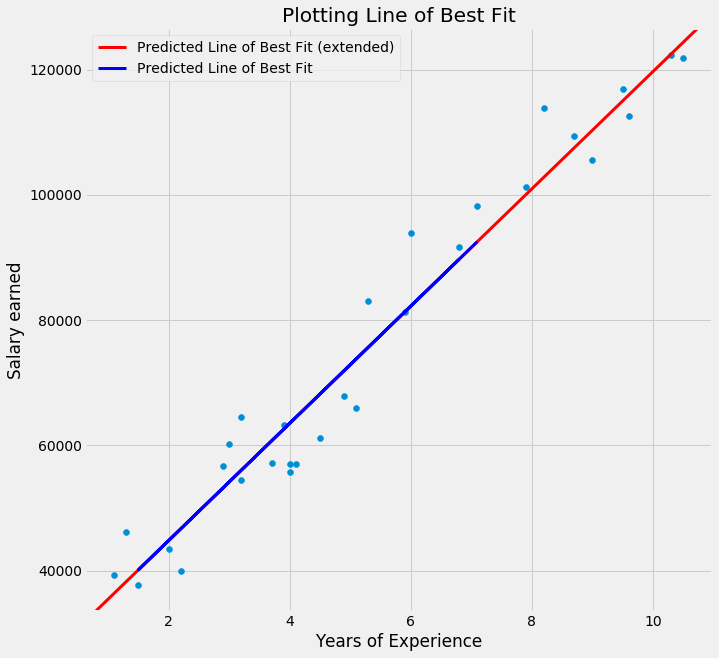

In [321]:
def extended(ax, x, y, **args):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x_ext = np.linspace(xlim[0], xlim[1], 100)
    p = np.polyfit(x, y , deg=1)
    y_ext = np.poly1d(p)(x_ext)
    ax.plot(x_ext, y_ext, **args)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return ax

plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.scatter(X,y)
ax = extended(ax, X_test, y_pred,  color="r", lw=3, label="Predicted Line of Best Fit (extended)")
ax.plot(X_test,y_pred,color='blue', lw=3, label="Predicted Line of Best Fit")
plt.xlabel("Years of Experience")
plt.ylabel("Salary earned")
plt.title("Plotting Line of Best Fit")
ax.legend()
plt.show()